# Heart Disease Prediction ML Project: Data Preparation

## Imports and Config

## Imports

In [1]:
import pandas as pd

from src.config import DIR_RAW_DATA
from src.loading import load_raw_data
from src.preparation import rename_features, numeric_to_string
from src.mappings import (
    FEATURE_NAME_MAPPING,
    FEATURE_CAT_MAPPING
)

### Config

In [2]:
RAW_TEST_DATA="test.csv"
RAW_TRAIN_DATA="train.csv"

## Import and Prepare Data

### Import Data

In [3]:
train_data_raw = load_raw_data(DIR_RAW_DATA, RAW_TRAIN_DATA)
test_data_raw = load_raw_data(DIR_RAW_DATA, RAW_TEST_DATA)

### Prepare Data

In [4]:
train_data_renamed = rename_features(train_data_raw, FEATURE_NAME_MAPPING)
test_data_renamed = rename_features(test_data_raw, FEATURE_NAME_MAPPING)

train_data_converted= train_data_renamed.copy()
test_data_converted = test_data_renamed.copy()

for var_name, var_map in FEATURE_CAT_MAPPING.items():
    train_data_converted = numeric_to_string(
        train_data_converted, var_name, var_map
    )
    test_data_converted = numeric_to_string(
        test_data_converted, var_name, var_map
    )

train = train_data_converted
test = test_data_converted

## Explore Features

### Feature: Age

Missing values: 0
count    630000.000000
mean         54.136706
std           8.256301
min          29.000000
25%          48.000000
50%          54.000000
75%          60.000000
max          77.000000
Name: age, dtype: float64


Axes(0.125,0.11;0.775x0.77)


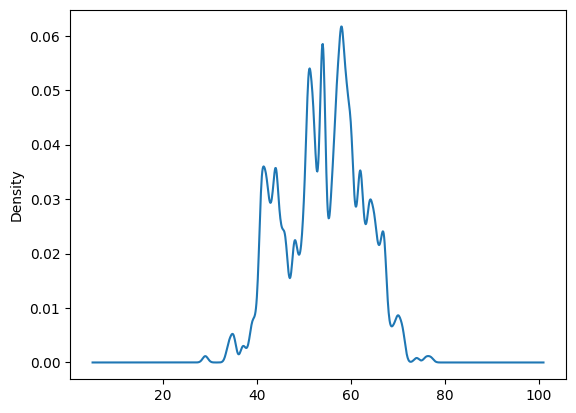

In [5]:
print(f'Missing values: {train["age"].isna().sum()}')
print(train["age"].describe())
print(train["age"].plot(kind="density"))

- No missing values
- No extreme values
- No extremely skewed distribution

### Feature: Sex

In [6]:
print(f'Missing values: {train["sex"].isna().sum()}')
print(train["sex"].value_counts(normalize=True))

Missing values: 0
sex
male      0.714735
female    0.285265
Name: proportion, dtype: float64


- No missing values
- Higher share of male patients

### Feature: Chest Pain Type

In [7]:
print(f'Missing values: {train["chest_pain_type"].isna().sum()}')
print(train["chest_pain_type"].value_counts(normalize=True))

Missing values: 0
chest_pain_type
Asymptomatic        0.522506
Non-anginal pain    0.313140
Atypical angina     0.118954
Typical angina      0.045400
Name: proportion, dtype: float64


- No missing values
- Uneven distribution across categories

### Feature: Blood Pressure

Missing values: 0
count    630000.000000
mean        130.497433
std          14.975802
min          94.000000
25%         120.000000
50%         130.000000
75%         140.000000
max         200.000000
Name: blood_pressure, dtype: float64
Axes(0.125,0.11;0.775x0.77)


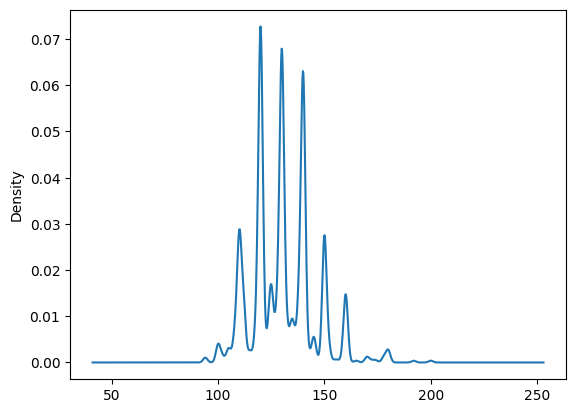

In [8]:
print(f'Missing values: {train["blood_pressure"].isna().sum()}')
print(train["blood_pressure"].describe())
print(train["blood_pressure"].plot(kind="density"))

- No missing values
- No extremely skewed distribution
- Some extreme values at the upper end

### Feature: Cholesterol

Missing values: 0
count    630000.000000
mean        245.011814
std          33.681581
min         126.000000
25%         223.000000
50%         243.000000
75%         269.000000
max         564.000000
Name: cholesterol, dtype: float64
Axes(0.125,0.11;0.775x0.77)


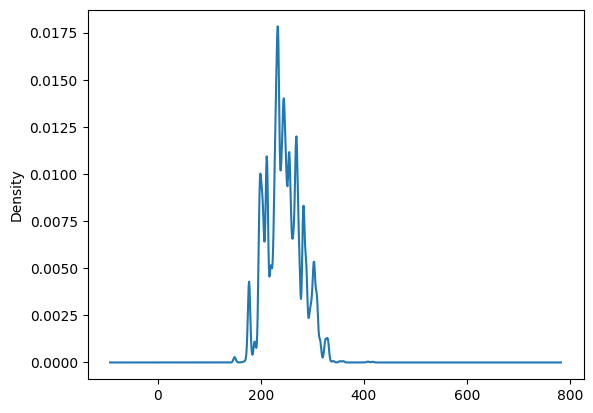

In [9]:
print(f'Missing values: {train["cholesterol"].isna().sum()}')
print(train["cholesterol"].describe())
print(train["cholesterol"].plot(kind="density"))

- No missing values
- No extremely skewed distribution

### Feature: Blood Sugar

In [10]:
print(f'Missing values: {train["fbs_over_120"].isna().sum()}')
print(train["fbs_over_120"].value_counts(normalize=True))

Missing values: 0
fbs_over_120
no     0.920013
yes    0.079987
Name: proportion, dtype: float64


- No missing values
- Very uneven distribution across categories

### Feature: EKG Results

In [11]:
print(f'Missing values: {train["ekg_results"].isna().sum()}')
print(train["ekg_results"].value_counts(normalize=True))

Missing values: 0
ekg_results
Normal                          0.508121
Left ventricular hypertrophy    0.489781
ST-T wave abnormality           0.002098
Name: proportion, dtype: float64


- No missing values
- One of three categories with negligible share; the other two evenly distributed

### Feature: Heart Rate

Missing values: 0
count    630000.000000
mean        152.816763
std          19.112927
min          71.000000
25%         142.000000
50%         157.000000
75%         166.000000
max         202.000000
Name: max_hr, dtype: float64
Axes(0.125,0.11;0.775x0.77)


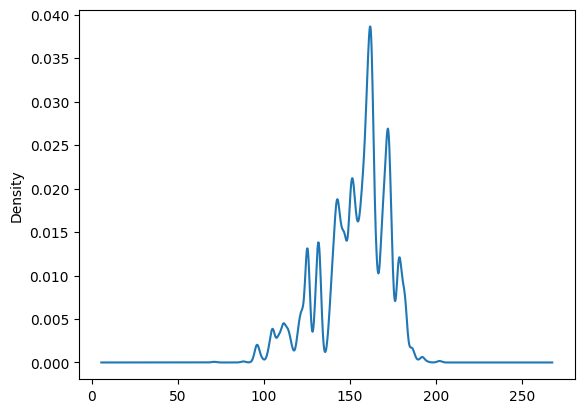

In [12]:
print(f'Missing values: {train["max_hr"].isna().sum()}')
print(train["max_hr"].describe())
print(train["max_hr"].plot(kind="density"))

- No missing values
- Distribution skewed to the left
- Some extreme values at the lower end

### Feature: Exercise Angina

In [13]:
print(f'Missing values: {train["exercise_angina"].isna().sum()}')
print(train["exercise_angina"].value_counts(normalize=True))

Missing values: 0
exercise_angina
no     0.726275
yes    0.273725
Name: proportion, dtype: float64


- No missing values
- Uneven distribution across the two categories

### Feature: ST Depression

Missing values: 0
count    630000.000000
mean          0.716028
std           0.948472
min           0.000000
25%           0.000000
50%           0.100000
75%           1.400000
max           6.200000
Name: st_depression, dtype: float64
Axes(0.125,0.11;0.775x0.77)


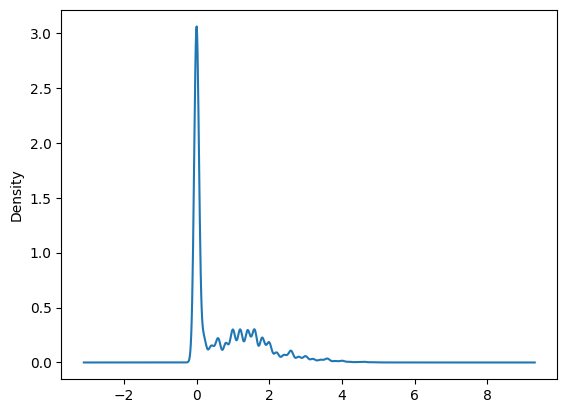

In [14]:
print(f'Missing values: {train["st_depression"].isna().sum()}')
print(train["st_depression"].describe())
print(train["st_depression"].plot(kind="density"))

- No missing values
- Strongly left-skewed distribution
- Some extreme values at the upper end

### Feature: Slope ST

In [ ]:
print(f'Missing values: {train["slope_st"].isna().sum()}')
print(train["slope_st"].describe())
print(train["slope_st"].plot(kind="density"))

Missing values: 0
count    630000.000000
mean          1.455871
std           0.545192
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: slope_st, dtype: float64


- No missing values
- Only three unique values
- Strongly right-skewed distribution

### Feature: Number of Vessels

Missing values: 0
count    630000.000000
mean          0.451040
std           0.798549
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: number_vessels_fluro, dtype: float64
Axes(0.125,0.11;0.775x0.77)


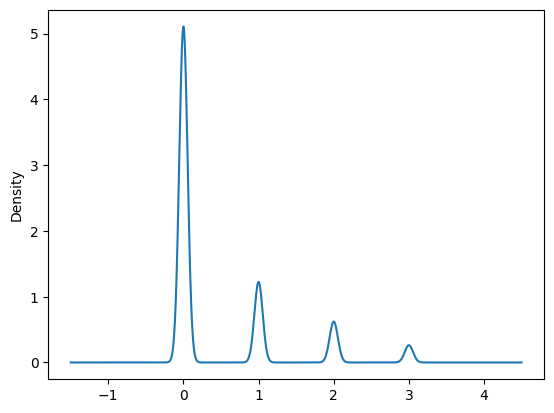

In [ ]:
print(f'Missing values: {train["number_vessels_fluro"].isna().sum()}')
print(train["number_vessels_fluro"].describe())
print(train["number_vessels_fluro"].plot(kind="density"))

- No missing values
- Only four distinct values
- Strongly right-skewed distribution

### Feature: Thallium

In [ ]:
print(f'Missing values: {train["thallium"].isna().sum()}')
print(train["thallium"].value_counts(normalize=True))

Missing values: 0
thallium
normal               0.590930
reversible defect    0.391663
fixed effect         0.017406
Name: proportion, dtype: float64


- No missing values
- Uneven distribution across the three categories

### Target: Heart Disease

In [ ]:
print(f'Missing values: {train["heart_disease"].isna().sum()}')
print(train["heart_disease"].value_counts(normalize=True))

Missing values: 0
heart_disease
Absence     0.55166
Presence    0.44834
Name: proportion, dtype: float64


- No missing values
- Rather even distribution across categories